# Bachelor of Science in Software Development

## Machine Learning & Programming for Data Science

`Name` : Gabriel Tindi
    
`RegNo` : 19/06014

## Sales Prediction

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

## Problem Statement

The challenge at hand centers on the anticipation of future product sales, a critical task for businesses aiming to leverage data-driven insights. Concentrating on advertising expenditures, our objective is to harness advanced machine learning techniques to unravel intricate patterns, reveal correlations, and deliver actionable intelligence. This, in turn, empowers businesses to make well-informed decisions that optimize marketing strategies and enhance overall sales performance..This predictive model aims to provide insights into the relationship between advertising investments and sales, ultimately assisting in optimizing marketing budgets and improving overall sales performance."

## Main Objective

The goal is to create a robust and reliable model that can guide marketing strategies by identifying the most effective media channels for maximizing sales.

## Importing Relevant libraries

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Loading Data

In [3]:
# import pandas as pd
data = pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data Understanding

In [4]:
# Checking the dimensionalities of our dataset
print(data.shape)

(200, 4)


In [5]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
# To get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#To check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Checking for duplicates
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [10]:
# Descriptive Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


## Data Preparation

### Data Cleaning

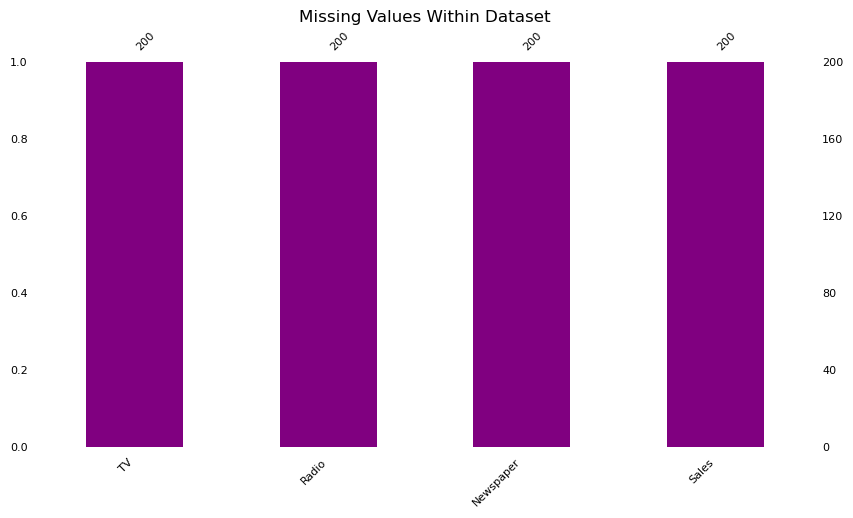

In [11]:
# Visualise the missing values in the dataset
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset')
plt.show()

The data has no missing values/duplicates it can proceed to analysis.

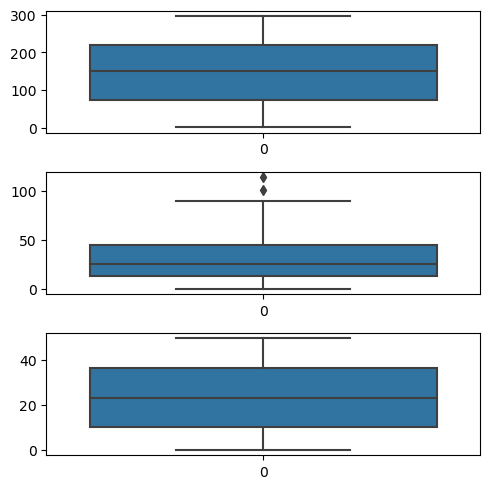

In [12]:
import seaborn as sns
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

There are no outliers

# Exploratory Data Analysis

In [13]:
# Getting the statistic summary of columns
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Univariate Analysis

Exploring the target variable

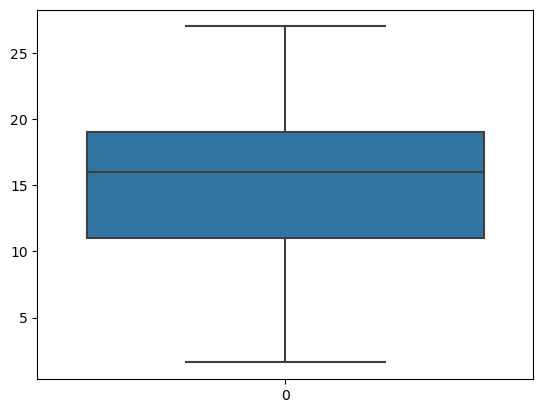

In [14]:

# Checking the distribution of values in the target feature
sns.boxplot(data['Sales'])
plt.show()


In [15]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

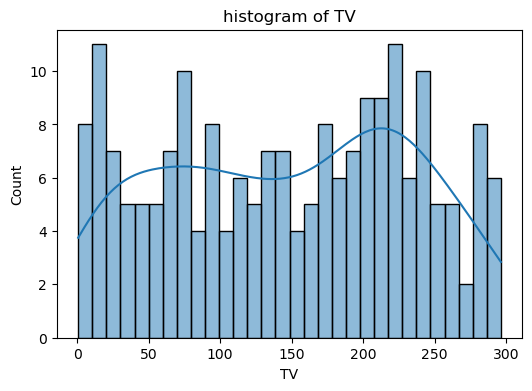

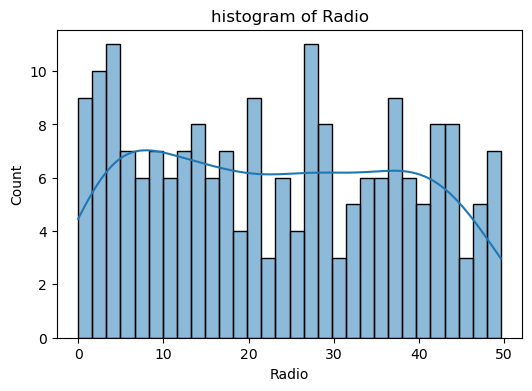

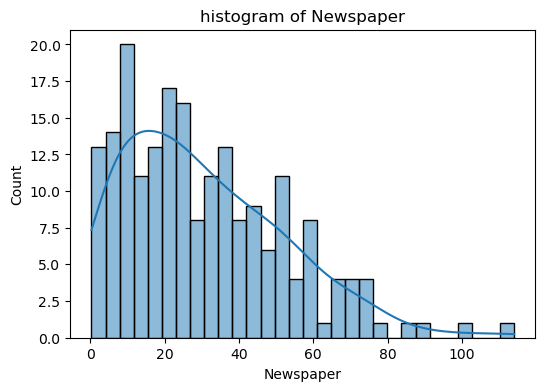

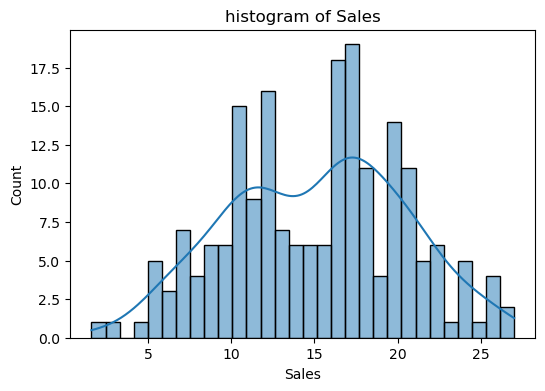

In [16]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data[['TV', 'Radio', 'Newspaper', 'Sales']]

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column,bins = 30 ,common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

## Bivariate Analysis

/home/astro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


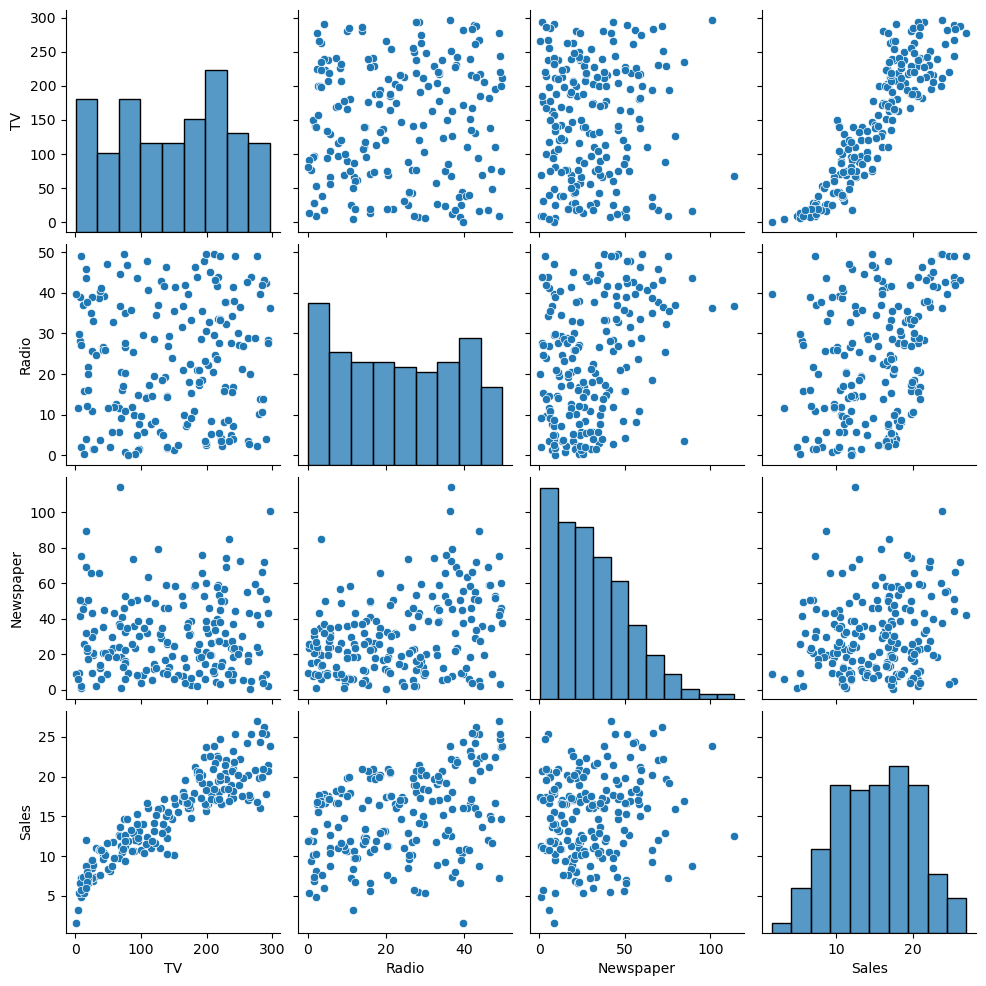

In [17]:
sns.pairplot(data)
plt.show()

In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


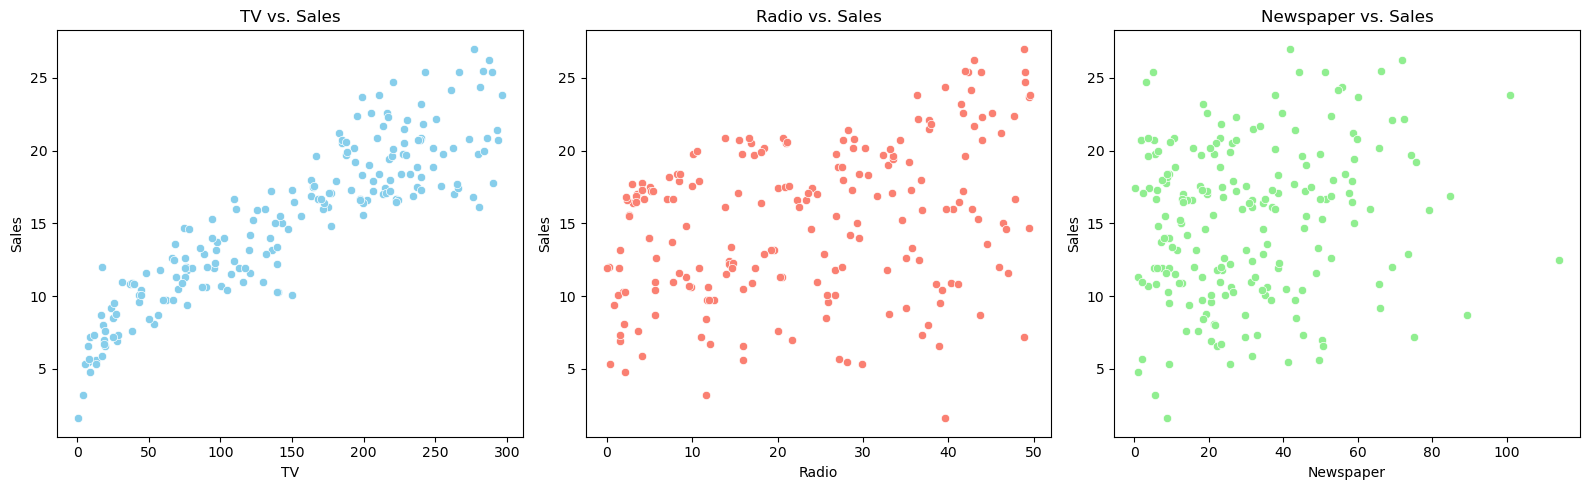

In [19]:
# Scatter plots for Sales vs. Advertising Expenditure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

sns.scatterplot(x='TV', y='Sales', data=data, ax=axes[0], color='skyblue')
axes[0].set_title('TV vs. Sales')

sns.scatterplot(x='Radio', y='Sales', data=data, ax=axes[1], color='salmon')
axes[1].set_title('Radio vs. Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=data, ax=axes[2], color='lightgreen')
axes[2].set_title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()

## Correlation Matrix

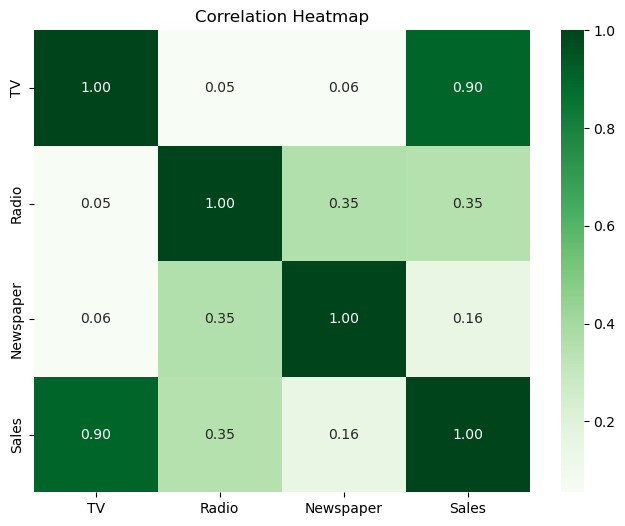

In [20]:

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable on the baseline model.

## Modelling

## Baseline Model

In [21]:
import statsmodels.api as sm
# Setting the target and predictor variables for our baseline model
y = data['Sales']
X_baseline = data[['TV']]

# Creating the model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
# Fitting the model 
baseline_results = baseline_model.fit()
# Printing the summary of the model
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           7.93e-74
Time:                        18:01:27   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [22]:
# Getting the coefficients of the model
baseline_results.params

const    6.974821
TV       0.055465
dtype: float64

In [23]:
# Getting the p-value of the f-statistic
baseline_results.f_pvalue

7.927911625320458e-74

In [24]:
# Getting the R-squared of the model
baseline_results.rsquared

0.8121757029987414

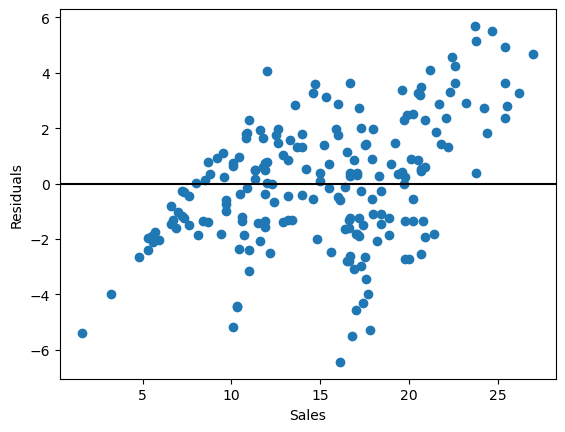

In [25]:
# Plotting residuals
fig, ax = plt.subplots()
ax.scatter(data['Sales'], baseline_results.resid)
ax.axhline(y = 0, color = 'black')
ax.set_xlabel('Sales')
ax.set_ylabel('Residuals');

In [26]:
# Create a function that calculates mae and rmse
def metrics(results):
    mae = (results.resid.abs().sum()) / len(results.resid)
    rmse = (((results.resid ** 2).sum()) / len(results.resid)) ** 0.5
    print(f'MAE: {mae} \nRMSE: {rmse}')

metrics(baseline_results)

MAE: 1.8305872641932417 
RMSE: 2.2842381438447106


The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. 


2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV



3. F statistic has a very low p value 
Meaning that the model fit is statistically significant.




## Second Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Setting the target and predictor variables for our baseline model
y = data['Sales']
X_baseline = data[['TV','Newspaper','Radio']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Creating the Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# You can also print feature importances if needed
print('Feature Importances:', rf_model.feature_importances_)

RMSE: 1.2022483936358577
Feature Importances: [0.845511   0.01787786 0.13661114]


## Use of grid search to find the best parameter

In [29]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# Setting the target and predictor variables for our baseline model
y = data['Sales']
X_baseline = data[['TV', 'Radio', 'Newspaper']]

# Creating the linear regression model
baseline_model = make_pipeline(StandardScaler(), LinearRegression())

# Define the parameter grid for grid search
param_grid = {
    'linearregression__fit_intercept': [True, False],
}

# Create GridSearchCV
grid_search = GridSearchCV(
    baseline_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fit the model
grid_search.fit(X_baseline, y)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Cross-validate the best model
cv_score = cross_val_score(best_model, X_baseline, y, cv=5, scoring='neg_mean_squared_error')

# Printing the best parameters and cross-validation results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)
print("Cross-validation scores:", -cv_score)


Best parameters: {'linearregression__fit_intercept': True}
Best cross-validation score: 2.8582430099910106
Cross-validation scores: [3.05606897 2.02676065 1.85105212 4.72039259 2.63694072]


## Model Evaluation

Considering these metrics, we generally aim for models with lower MAE and RMSE and a lower cross-validation score. Based on the RMSE scores:

Random Forest has the lowest RMSE (1.2022), indicating better performance than Model 1.
The cross-validation score for the best model from Grid Search is 2.8582, which is relatively high compared to the RMSE of Random Forest.

## Recommendations

1. Feature Engineering:

   Explore additional features or derived variables that might enhance the model's predictive power. For instance, consider creating new features based on seasonality, holidays, or special events.

2.   Advanced Models:

     Experiment with more sophisticated machine learning models beyond linear regression, such as ensemble methods ( Gradient 
    
      Boosting), neural networks, or advanced regression techniques.